In [1]:
%matplotlib inline

import pandas
from sklearn.cross_validation import train_test_split
import numpy as np
import time
import Recommenders as Recommenders
import Evaluation as Evaluation
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
#from surprise import Reader, Dataset, SVD, evaluate
import warnings; warnings.simplefilter('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Loading data"
ratings_electronics = pd.read_csv(r"C:\Users\Sairam\Desktop\AIML\RESIDENCY 5\Lab_External\ratings_Electronics.csv")
#books= books.loc[:, ~books.columns.str.contains('^Unnamed')]
ratings_electronics.columns = ['user_id','prod_id', 'rating', 'timestamp']
ratings_electronics

,user_id,prod_id,rating,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [3]:
ratings_electronics.info(), ratings_electronics.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
user_id      object
prod_id      object
rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


(None, (7824481, 4))

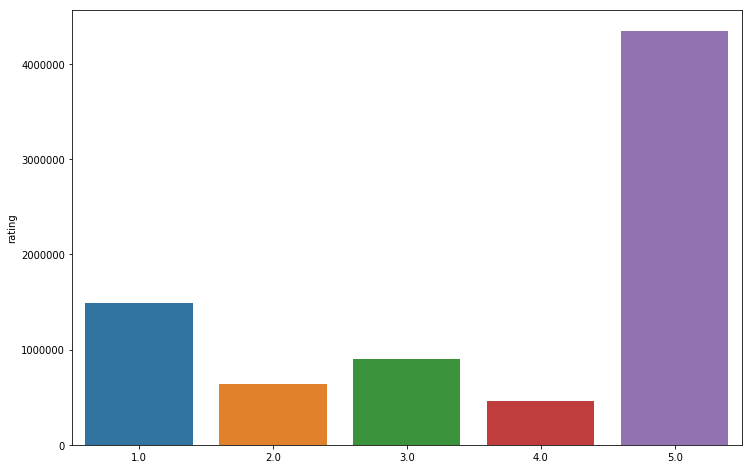

In [4]:
fig = plt.figure(figsize=(12,8))
sns.barplot(x = ratings_electronics['rating'].unique(), y= ratings_electronics['rating'].value_counts())
plt.show()

In [5]:
type(ratings_electronics)

pandas.core.frame.DataFrame

In [6]:
ratings_electronics.isna().sum()

user_id      0
prod_id      0
rating       0
timestamp    0
dtype: int64

In [7]:
ratings_electronics.isnull().sum()

user_id      0
prod_id      0
rating       0
timestamp    0
dtype: int64

In [8]:
ratings_electronics.describe()

,rating,timestamp
count,7.824481e+06,7.824481e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


In [9]:
counts = ratings_electronics['user_id'].value_counts()
ratings_electronics = ratings_electronics[ratings_electronics['user_id'].isin(counts[counts >= 50].index)]

In [10]:
users = ratings_electronics['user_id'].unique()
len(users)

1540

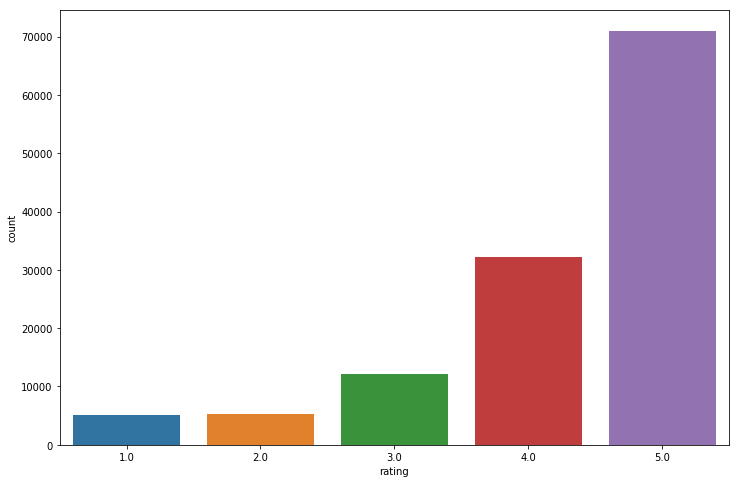

In [11]:
# After filtering the users below is the rating split

fig = plt.figure(figsize=(12,8))
sns.countplot(data = ratings_electronics, x= 'rating')
plt.show()

In [12]:
# create training and testing vars

#X_train, X_test, y_train, y_test = train_test_split(ratings_electronics, test_size=0.2)
train_data, test_data = train_test_split(ratings_electronics, test_size = 0.30, random_state=0)
#train_data, test_data = train_test_split(song_df, test_size = 0.20, random_state=0)
print(train_data.head(5))

                user_id     prod_id  rating   timestamp
6595852  A2BYV7S1QP2YIG  B009EAHVTA     5.0  1399161600
4738240   AB094YABX21WQ  B0056XCEAA     1.0  1315267200
4175595  A3D0UM4ZD2CMAW  B004I763AW     5.0  1355616000
3753015   AATWFX0ZZSE6C  B0040NPHMO     3.0  1293753600
1734766  A1NNMOD9H36Q8E  B0015VW3BM     4.0  1220313600


In [13]:
pm = Recommenders.popularity_recommender_py()
pm.create(ratings_electronics, 'user_id', 'prod_id')

In [14]:
user_id = users[89]
pm.recommend(user_id)

,user_id,prod_id,score,Rank
39003,AQ3IN3MRXQ5KH,B0088CJT4U,206,1.0
24827,AQ3IN3MRXQ5KH,B003ES5ZUU,184,2.0
11078,AQ3IN3MRXQ5KH,B000N99BBC,167,3.0
38250,AQ3IN3MRXQ5KH,B007WTAJTO,164,4.0
38615,AQ3IN3MRXQ5KH,B00829TIEK,149,5.0
38611,AQ3IN3MRXQ5KH,B00829THK0,137,6.0
39338,AQ3IN3MRXQ5KH,B008DWCRQW,137,7.0
21982,AQ3IN3MRXQ5KH,B002R5AM7C,128,8.0
28761,AQ3IN3MRXQ5KH,B004CLYEDC,118,9.0
22210,AQ3IN3MRXQ5KH,B002SZEOLG,113,10.0


# Collaborative Recommendation Systems

In [15]:
counts = ratings_electronics['user_id'].value_counts()
ratings_df = ratings_electronics[ratings_electronics['user_id'].isin(counts[counts >= 50].index)]

counts1 = ratings_electronics['rating'].value_counts()
ratings_df = ratings_electronics[ratings_electronics['rating'].isin(counts1[counts1 >= 50].index)]

print(ratings_df.shape)


(125871, 4)


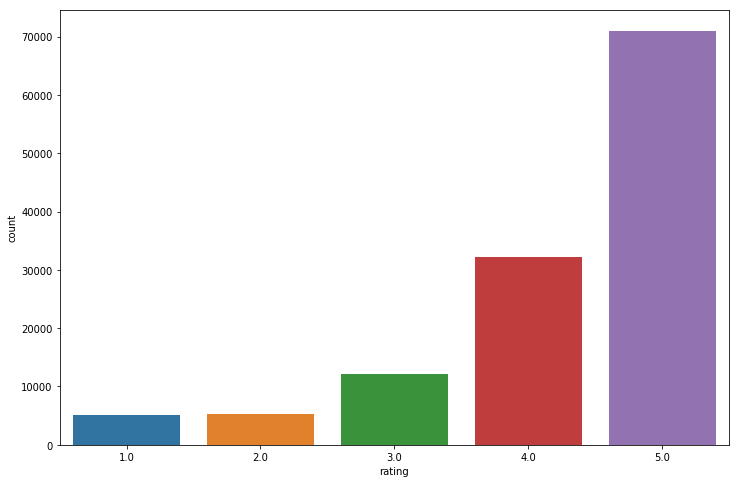

In [16]:
# After filtering the users below is the rating split

fig = plt.figure(figsize=(12,8))
sns.countplot(data = ratings_electronics, x= 'rating')
plt.show()

# Generating ratings matrix from explicit ratings

In [17]:
ratings_matrix = ratings_electronics.pivot(index="user_id",columns="prod_id",values="rating").fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head(5)

(1540, 48190)


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from scipy.sparse.linalg import svds

R = ratings_matrix.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_demeaned, k = 50)
print("U",U.shape)

# since we need only the diagnal matrix
sigma = np.diag(sigma)
print("Sigma",sigma.shape)
print("Vt", Vt.shape)
all_user_predicted_ratings = np.dot(np.dot(U,sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds = pd.DataFrame(all_user_predicted_ratings, columns = ratings_matrix.columns,index = ratings_matrix.index)
preds['user_id'] = preds.index
preds.head()

U (1540, 50)
Sigma (50, 50)
Vt (50, 48190)


prod_id,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_id
user_id,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.007524,0.004419,0.005473,-0.039384,0.010730,0.009077,0.022783,0.002610,0.020192,0.007894,...,-0.056550,0.003601,-0.121466,0.031460,0.018503,0.005042,-0.175003,0.010368,-0.012422,A100UD67AHFODS
A100WO06OQR8BQ,0.002017,-0.011281,-0.000990,0.130663,0.006675,-0.003692,0.063175,-0.001179,0.015445,-0.002837,...,0.010842,0.001158,0.023724,-0.042345,0.003810,0.001879,-0.025018,-0.013943,0.037576,A100WO06OQR8BQ
A105S56ODHGJEK,-0.002300,-0.003010,-0.007833,0.006770,0.005038,-0.004635,-0.004043,0.006798,-0.005971,-0.003314,...,-0.051062,-0.000178,-0.053547,0.016715,-0.005317,-0.002765,0.086945,-0.110751,0.007936,A105S56ODHGJEK
A105TOJ6LTVMBG,0.003496,0.012581,-0.004962,-0.011772,0.001164,0.003484,-0.004064,-0.000244,0.005212,0.002996,...,-0.007057,0.001273,-0.047299,0.024871,0.008347,0.005007,0.006827,-0.015169,-0.025048,A105TOJ6LTVMBG
A10AFVU66A79Y1,0.000979,-0.003212,0.011373,0.012085,0.008620,0.005637,0.016947,0.002684,-0.000386,0.005203,...,0.022994,0.000151,-0.021333,-0.011562,0.000664,0.000559,-0.026706,0.010356,0.009675,A10AFVU66A79Y1


In [19]:
#preds['user_id'] = preds.user_id.astype('str', inplace = True)
preds['user_id'] = preds['user_id'].astype('str', inplace = True)
#data1['Price']=data1.Price.astype('int64')
#preds = preds.convert_objects(convert_numeric=True)
#preds['user_id'] = preds.user_id.apply(pd.to_numeric, errors='coerce')
preds.dtypes

prod_id
0594451647    float64
0594481813    float64
0970407998    float64
0972683275    float64
1400501466    float64
1400501520    float64
1400501776    float64
1400532620    float64
1400532655    float64
140053271X    float64
1400599997    float64
1400698987    float64
1400699169    float64
1685560148    float64
3744295508    float64
7562434166    float64
787988002X    float64
8862935307    float64
8862936826    float64
9043413585    float64
9573212900    float64
9573212919    float64
9575871979    float64
9800359788    float64
9981719005    float64
9981734241    float64
9981739588    float64
9983722615    float64
998376234X    float64
9983891212    float64
               ...   
B00KWMNDDM    float64
B00KWPRSJY    float64
B00KWWY1PQ    float64
B00KXAFYZS    float64
B00KXMN08E    float64
B00KXUHX9S    float64
B00KYA7CT8    float64
B00KYMCJF8    float64
B00L0YFJHY    float64
B00L1I727Y    float64
B00L1I80K2    float64
B00L1NZTSS    float64
B00L21HC7A    float64
B00L2442H0    float64
B0

In [22]:
user = 'A100WO06OQR8BQ'
#str(user)

In [23]:
user_row = 2

In [30]:
# test = pred_df.copy(deep = True)
# test['user_id']= test['user_id'].astype(str)

In [24]:
pred_df = preds[preds['user_id'] == str(user)].transpose()
pred_df = pred_df.sort_values(user,ascending = False)
pred_df.head(5)

TypeError: '<' not supported between instances of 'float' and 'str'